# Explore Medical Insurance Cost Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/raw/medical_insurance_cost.csv')

## Exploratory Data Analysis

In [2]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(df.shape, '\n')
print(list(df.columns), '\n')
print(df.info())

(1338, 7) 

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


- The dataset has 1338 rows and 7 columns
- 4 columns have numerical data, 3 are categorical
- the categorical data are sex, smoker and region

### Drop Duplicates

In [4]:
df.drop_duplicates(inplace=True)

### Check for Null Values

In [5]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Categorical Analysis

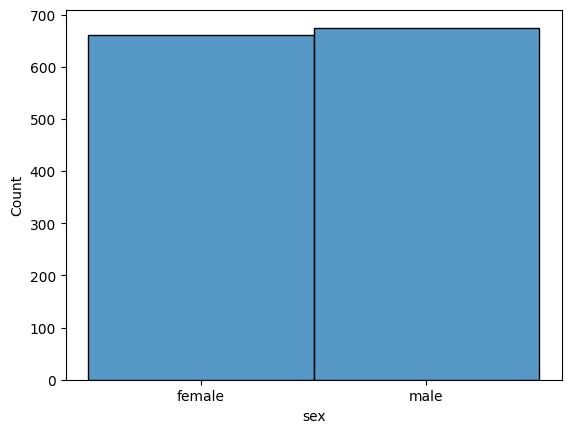

In [6]:
df.sex.value_counts()
df['sex_num'] = df.sex.map({'male': 0, 'female': 1})

sns.histplot(data=df, x='sex')
plt.show()

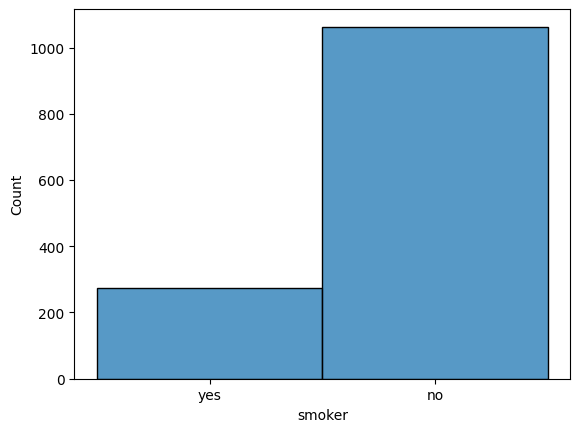

In [7]:
df.smoker.value_counts()
df['smoker_num'] = df.smoker.map({'yes': 1, 'no': 0})

sns.histplot(data=df, x='smoker')
plt.show()

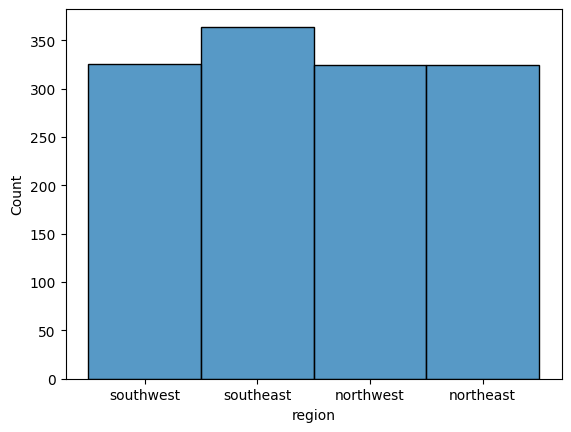

In [8]:
df.region.value_counts()
df['region_num'] = df['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

sns.histplot(data=df, x='region')
plt.show()


In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_num,smoker_num,region_num
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,0,2
4,32,male,28.880,0,no,northwest,3866.85520,0,0,2


### Drop non-numerical columns

In [10]:
df_clean = df.drop(columns=["sex", "smoker", "region"], axis=1)

In [11]:
df_clean.head()

,age,bmi,children,charges,sex_num,smoker_num,region_num
0,19,27.900,0,16884.92400,1,1,0
1,18,33.770,1,1725.55230,0,0,1
2,28,33.000,3,4449.46200,0,0,1
3,33,22.705,0,21984.47061,0,0,2
4,32,28.880,0,3866.85520,0,0,2


#### Age Analysis

In [12]:
print(df.age.min(), df.age.max())

18 64


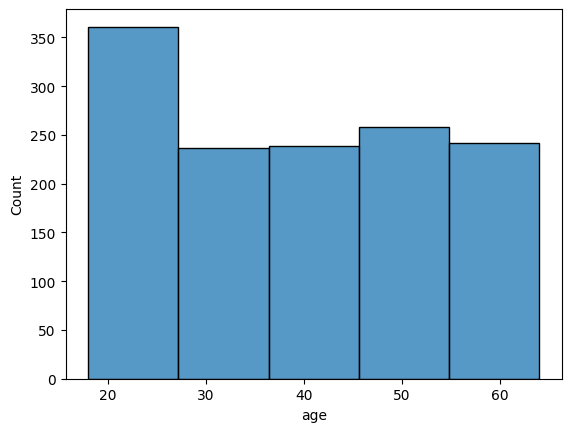

In [13]:
sns.histplot(data=df, x='age', binwidth=10, binrange=(df.age.min(), df.age.max()))
plt.show()

#### BMI Analysis

In [14]:
print(df.bmi.min(), df.bmi.max())

15.96 53.13


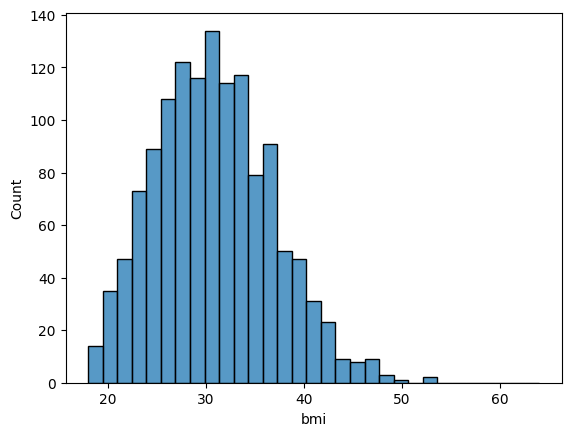

In [15]:
sns.histplot(data=df, x='bmi', binrange=(df.age.min(), df.age.max()))
plt.show()

#### Children Analysis

In [16]:
print(df.children.min(), df.children.max())

0 5


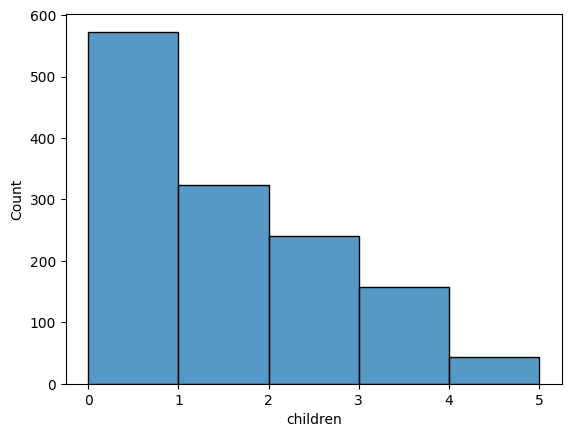

In [17]:
sns.histplot(data=df, x='children', binwidth=1, binrange=(df.children.min(), df.children.max()))
plt.show()

#### Charges Analysis

In [18]:
print(df.charges.min(), df.charges.max())

1121.8739 63770.42801


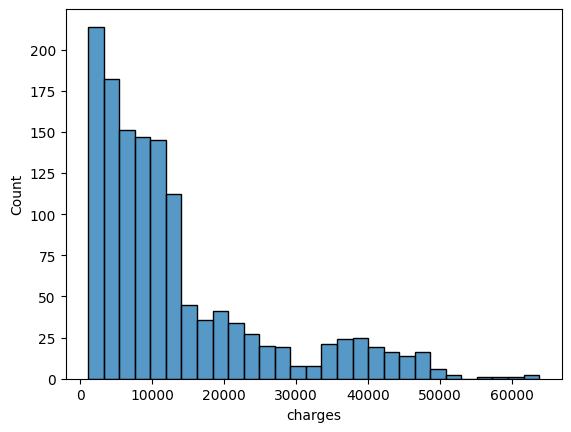

In [19]:
sns.histplot(data=df, x='charges', binrange=(df.charges.min(), df.charges.max()))
plt.show()

In [20]:
df_clean.head()

,age,bmi,children,charges,sex_num,smoker_num,region_num
0,19,27.900,0,16884.92400,1,1,0
1,18,33.770,1,1725.55230,0,0,1
2,28,33.000,3,4449.46200,0,0,1
3,33,22.705,0,21984.47061,0,0,2
4,32,28.880,0,3866.85520,0,0,2


In [21]:
df_clean.to_csv('../data/processed/medical_insurance_cost_clean.csv', index=False)  # Save the clean data to a new csv file